# Ridge Regression
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_excel('./AirQualityUCI.xlsx')
data.head()

Date      Time  Averaged_concentrationCO(GT)  \
0 2004-03-10  18:00:00                           2.6   
1 2004-03-10  19:00:00                           2.0   
2 2004-03-10  20:00:00                           2.2   
3 2004-03-10  21:00:00                           2.2   
4 2004-03-10  22:00:00                           1.6   

   averaged_sensor_responsePT08.S1(CO)  \
0                              1360.00   
1                              1292.25   
2                              1402.00   
3                              1375.50   
4                              1272.25   

   Non_Metanic_HydroCarbons_concentration(GT)  Benzene_concentrationC6H6(GT)  \
0                                         150                      11.881723   
1                                         112                       9.397165   
2                                          88                       8.997817   
3                                          80                       9.228796   
4                                          51                       6.518224   

   titania_PT08.S2(NMHC)  NOx concentration(GT)  Tungsten_oxidePT08.S3(NOx)  \
0                1045.50                  166.0                     1056.25   
1                 954.75                  103.0                     1173.75   
2                 939.25                  131.0                     1140.00   
3                 948.25                  172.0                     1092.00   
4                 835.50                  131.0                     1205.00   

   NO2_concentration(GT)  Tungsten_oxidePT08.S4(NO2)  \
0                  113.0                     1692.00   
1                   92.0                     1558.75   
2                  114.0                     1554.50   
3                  122.0                     1583.75   
4                  116.0                     1490.00   

   Indium_oxide_PT08.S5(O3)   Temp  Relative_Humidity  AbsoluteHumidity  \
0                   1267.50  13.60          48.875001          0.757754   
1                    972.25  13.30          47.700000          0.725487   
2                   1074.00  11.90          53.975000          0.750239   
3                   1203.25  11.00          60.000000          0.786713   
4                   1110.00  11.15          59.575001          0.788794   

   Unnamed: 15  Unnamed: 16  
0          NaN          NaN  
1          NaN          NaN  
2          NaN          NaN  
3          NaN          NaN  
4          NaN          NaN

In [3]:
data.columns

Index(['Date', 'Time', 'Averaged_concentrationCO(GT)',
       'averaged_sensor_responsePT08.S1(CO)',
       'Non_Metanic_HydroCarbons_concentration(GT)',
       'Benzene_concentrationC6H6(GT)', 'titania_PT08.S2(NMHC)',
       'NOx concentration(GT)', 'Tungsten_oxidePT08.S3(NOx)',
       'NO2_concentration(GT)', 'Tungsten_oxidePT08.S4(NO2)',
       'Indium_oxide_PT08.S5(O3)', 'Temp', 'Relative_Humidity',
       'AbsoluteHumidity', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In [4]:
data.drop(labels=['Date', 'Time','AbsoluteHumidity', 'Unnamed: 15', 'Unnamed: 16'],
         axis=1, inplace=True)

In [5]:
data.head(1)

Averaged_concentrationCO(GT)  averaged_sensor_responsePT08.S1(CO)  \
0                           2.6                               1360.0   

   Non_Metanic_HydroCarbons_concentration(GT)  Benzene_concentrationC6H6(GT)  \
0                                         150                      11.881723   

   titania_PT08.S2(NMHC)  NOx concentration(GT)  Tungsten_oxidePT08.S3(NOx)  \
0                 1045.5                  166.0                     1056.25   

   NO2_concentration(GT)  Tungsten_oxidePT08.S4(NO2)  \
0                  113.0                      1692.0   

   Indium_oxide_PT08.S5(O3)  Temp  Relative_Humidity  
0                    1267.5  13.6          48.875001

In [6]:
data.isnull().sum()

Averaged_concentrationCO(GT)                  0
averaged_sensor_responsePT08.S1(CO)           0
Non_Metanic_HydroCarbons_concentration(GT)    0
Benzene_concentrationC6H6(GT)                 0
titania_PT08.S2(NMHC)                         0
NOx concentration(GT)                         0
Tungsten_oxidePT08.S3(NOx)                    0
NO2_concentration(GT)                         0
Tungsten_oxidePT08.S4(NO2)                    0
Indium_oxide_PT08.S5(O3)                      0
Temp                                          0
Relative_Humidity                             0
dtype: int64

In [7]:
# correlation
corrData= data.corr()

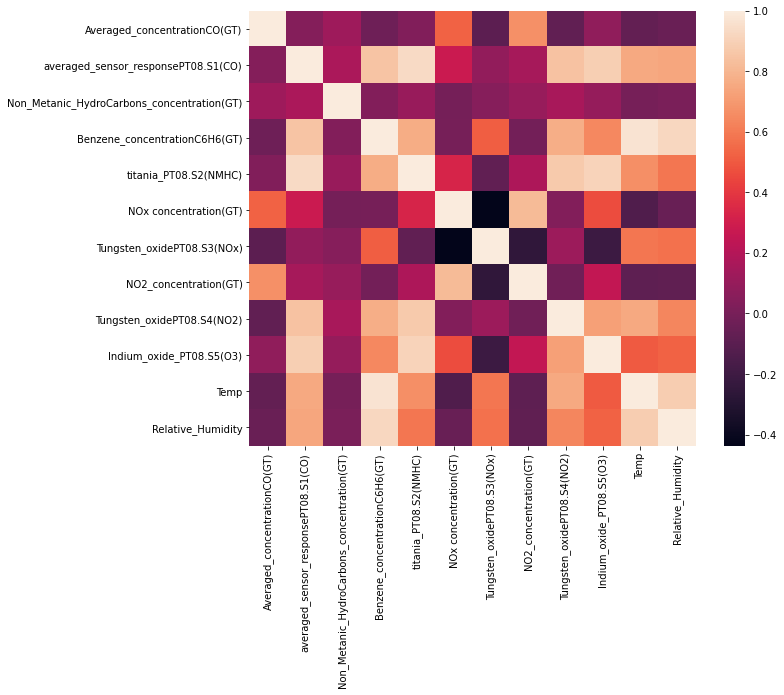

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(corrData)
plt.show()

In [9]:
# split the data into x and y
x= data.iloc[:,:-1]
y= data.iloc[:,-1]

In [10]:
# Train and test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,train_size=0.8, random_state=10)

In [12]:
# Ridge model
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=1.0)

In [13]:
ridge.fit(x_train, y_train)

Ridge()

In [14]:
y_pred= ridge.predict(x_test)

In [15]:
y_pred

array([  48.35152044, -207.04505952,   68.39792113, ...,   51.38024603,
         65.44896477,   61.41545364])

In [16]:
# slopes
ridge.coef_

array([ 0.00748343,  0.01202227, -0.01237124,  3.45912134, -0.18910329,
        0.02154134, -0.03635821, -0.03887763,  0.05349868,  0.00426162,
       -1.5246615 ])

In [17]:
# intercept
ridge.intercept_

151.7332116703823

In [18]:
# mean square error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

91.92527563084978

In [19]:
# RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

9.587766978334933

In [20]:
# R square 
ridge.score(x_test, y_test)

0.9595739675575229